In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 80)
pd.set_option('display.width', 500)

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [4]:
df_test = pd.read_csv("test.csv")

In [5]:
# before moving forward we will combine both the datasets to reduce time of pre-processing
# on two separate datasets
# whenever we have big data it will be better to combine and do the pre-processing
# To keep the track of two datasets we will add one more column called DATA telling its type

In [6]:
df["data"] = "train"
df_test["data"] = "test"

In [7]:
all_data = pd.concat([df, df_test], axis = 0)

In [8]:
all_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,data
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train


In [9]:
all_data.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,data
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,...,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,test
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,...,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,test


In [10]:
# Handle missing values

all_data.isnull().sum()/len(all_data)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

<AxesSubplot:>

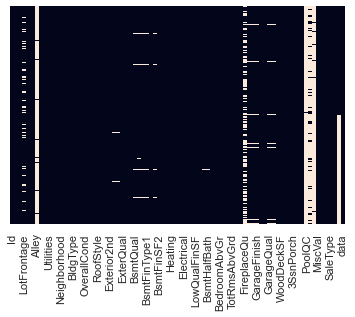

In [11]:
sns.heatmap(all_data.isnull(), yticklabels= False, cbar= False)

In [12]:
all_data = all_data.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1)


In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [14]:
all_data["MSZoning"].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [15]:
all_data["MSZoning"].mode()

0    RL
dtype: object

In [16]:
# Normal imputation of character variables 

In [17]:
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])
all_data["Utilities"] = all_data["Utilities"].fillna(all_data["Utilities"].mode()[0])
all_data["Exterior1st"] = all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0])
all_data["Exterior2nd"] = all_data["Exterior2nd"].fillna(all_data["Exterior2nd"].mode()[0])
all_data["MasVnrType"] = all_data["MasVnrType"].fillna(all_data["MasVnrType"].mode()[0])
all_data["BsmtQual"] = all_data["BsmtQual"].fillna(all_data["BsmtQual"].mode()[0])

all_data["BsmtCond"] = all_data["BsmtCond"].fillna(all_data["BsmtCond"].mode()[0])
all_data["BsmtExposure"] = all_data["BsmtExposure"].fillna(all_data["BsmtExposure"].mode()[0])
all_data["BsmtFinType1"] = all_data["BsmtFinType1"].fillna(all_data["BsmtFinType1"].mode()[0])
all_data["BsmtFinType2"] = all_data["BsmtFinType2"].fillna(all_data["BsmtFinType2"].mode()[0])
all_data["Electrical"] = all_data["Electrical"].fillna(all_data["Electrical"].mode()[0])
all_data["KitchenQual"] = all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0])

all_data["Functional"] = all_data["Functional"].fillna(all_data["Functional"].mode()[0])
all_data["GarageType"] = all_data["GarageType"].fillna(all_data["GarageType"].mode()[0])
all_data["GarageFinish"] = all_data["GarageFinish"].fillna(all_data["GarageFinish"].mode()[0])
all_data["GarageQual"] = all_data["GarageQual"].fillna(all_data["GarageQual"].mode()[0])
all_data["GarageCond"] = all_data["GarageCond"].fillna(all_data["GarageCond"].mode()[0])
all_data["SaleType"] = all_data["SaleType"].fillna(all_data["SaleType"].mode()[0])


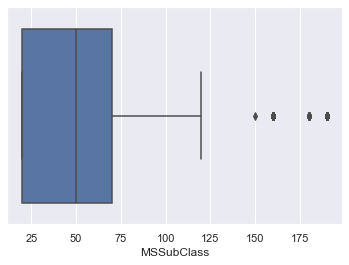

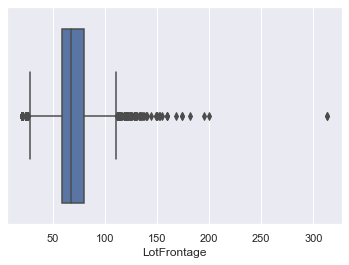

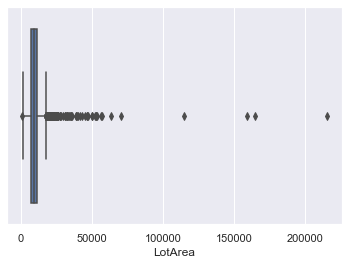

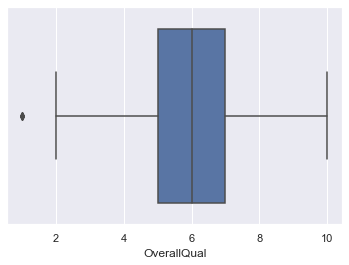

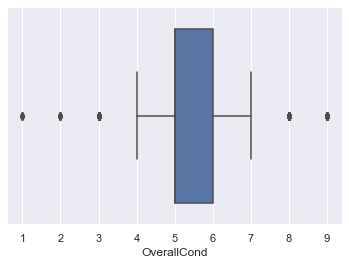

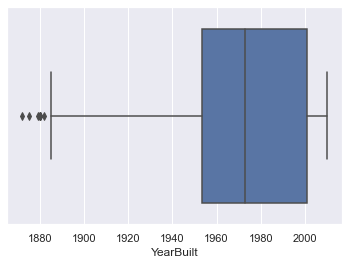

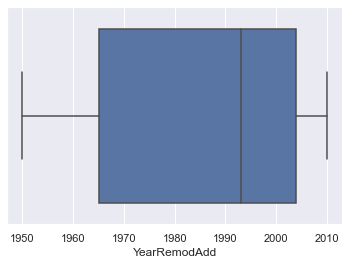

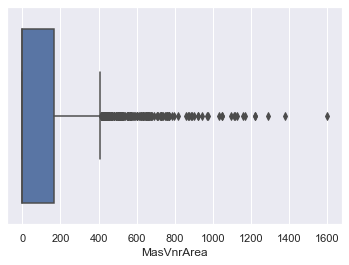

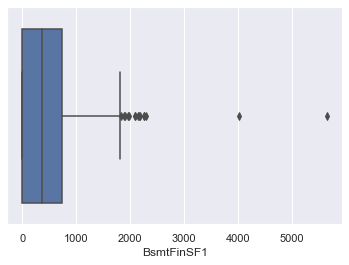

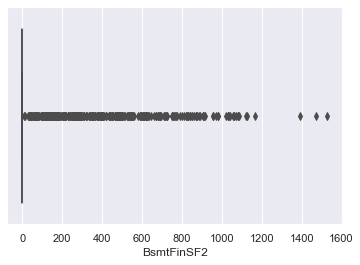

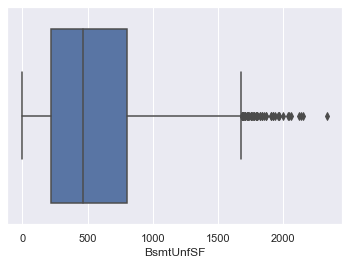

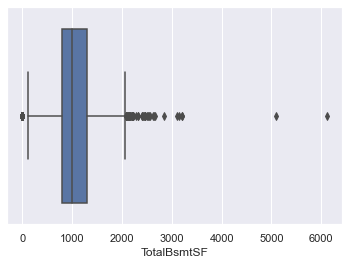

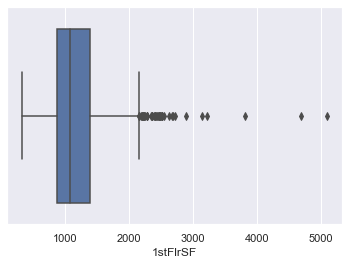

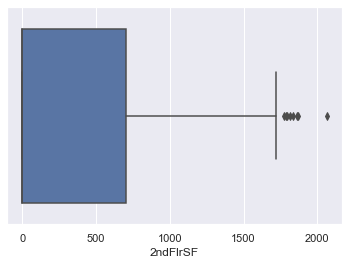

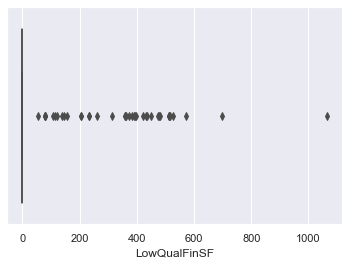

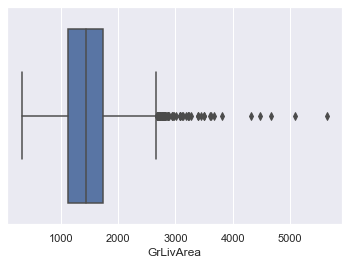

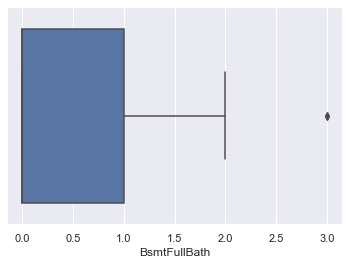

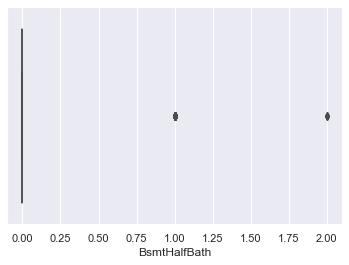

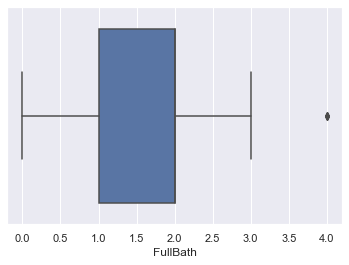

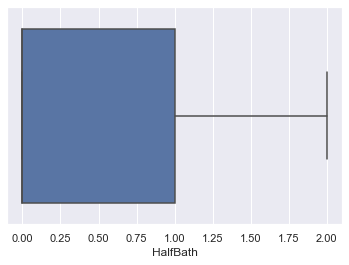

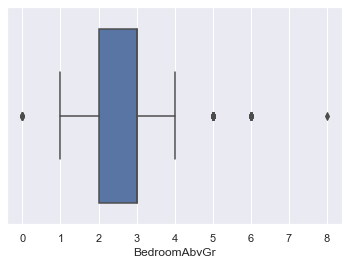

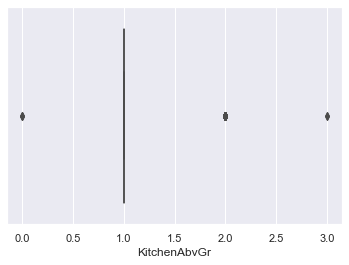

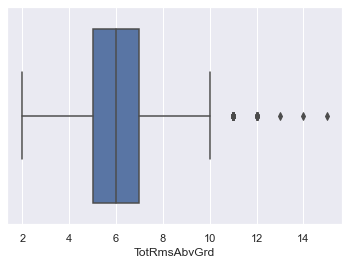

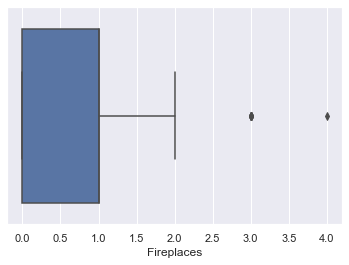

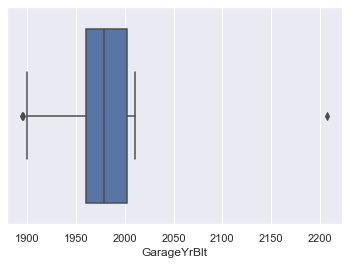

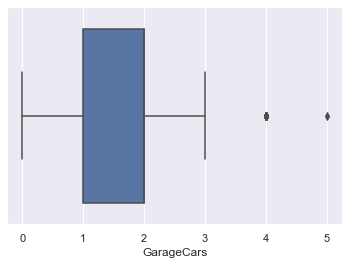

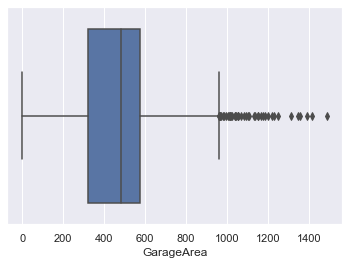

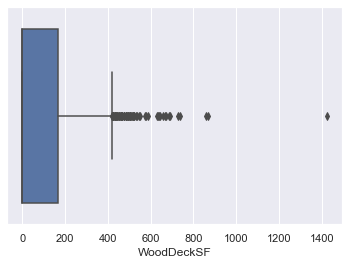

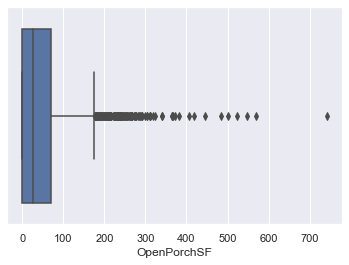

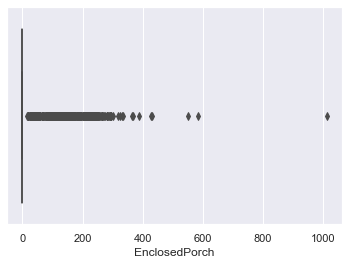

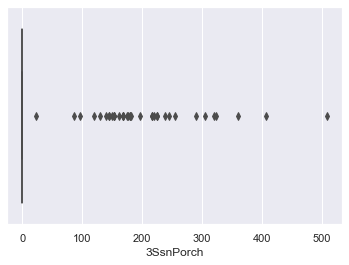

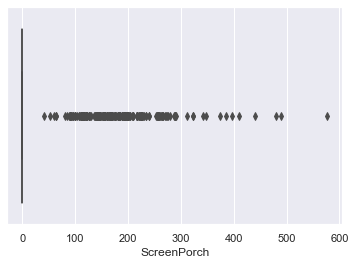

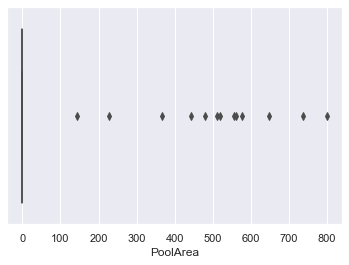

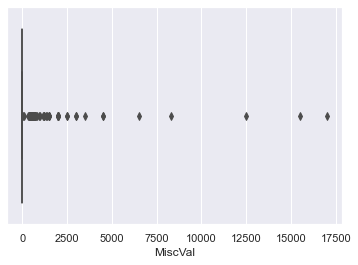

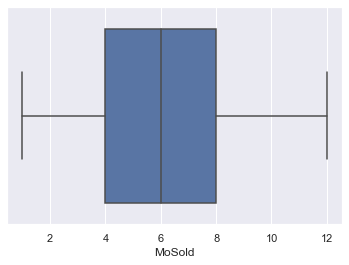

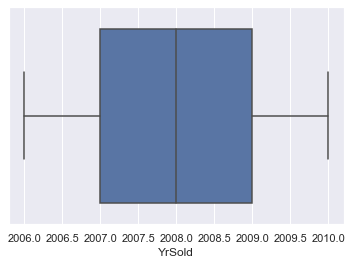

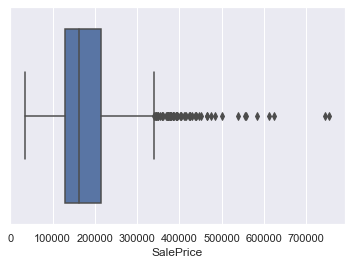

In [18]:
def boxplot(cols):
    sns.boxplot(all_data[cols])
    plt.show()
    
for i in list(all_data.select_dtypes(exclude= ["object"]).columns)[1:]:
    boxplot(i)
    
# function to check outliers in the dataset


In [19]:
from pandas_profiling import ProfileReport

In [20]:
# report = ProfileReport(all_data)
# report.to_file(output_file= "output.html")

In [21]:
# To be on safer side we will use imputing with median values because of outliers

all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].median())
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(all_data['MasVnrArea'].median())
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(all_data['BsmtFinSF1'].median())
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(all_data['BsmtFinSF2'].median())
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(all_data['BsmtUnfSF'].median())

all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(all_data['TotalBsmtSF'].median())
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(all_data['BsmtFullBath'].median())
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(all_data['BsmtHalfBath'].median())
all_data['TotRmsAbvGrd'] = all_data['TotRmsAbvGrd'].fillna(all_data['TotRmsAbvGrd'].median())
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(all_data['GarageYrBlt'].median())

all_data['GarageCars'] = all_data['GarageCars'].fillna(all_data['GarageCars'].median())
all_data['GarageArea'] = all_data['GarageArea'].fillna(all_data['GarageArea'].median())





In [22]:
# !pip install pandas-profiling

In [23]:
# my_data = all_data.copy()

In [24]:
# train = all_data[all_data['data']=='train']
# test = all_data[all_data['data']=='test']

In [25]:
# train = train.drop(['Id','data'], axis=1)
# test= test.drop(['Id','data', 'SalePrice'], axis=1)

In [26]:
mydata = all_data.copy()

In [27]:
# Handling categorical variables using encoding concept
# Lets use get_dummies feature of pandas (we can also use One Hot Encoding from Sklearn)

def handling_char_var(multicolumns):
    df_final = all_data
    i = 0
    for fields in multicolumns:
        print(fields)
        df1 = pd.get_dummies(all_data[fields], drop_first= True)
        
        all_data.drop([fields], axis=1, inplace= True)
        if i==0:
            df_final= df1.copy()
        else:
            df_final= pd.concat([df_final, df1], axis=1)
        i = i+1
        
    df_final= pd.concat([all_data, df_final], axis=1)
    
    return df_final

# We can use above function for object data type columns

In [28]:
# We can also try One hot encoding
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

In [29]:
# train.head()

In [30]:
mydata = handling_char_var(mydata.select_dtypes(include='object').columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition
data


In [31]:
mydata.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,...,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,train
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,0,0,...,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,0,0,...,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,0,0,...,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,0,0,...,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [32]:
mydata.tail()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,...,Fa,Gd,TA,Maj2,Min1,Min2,Mod,Sev,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,Unf,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,train
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,1979.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,NaN,0,0,...,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,NaN,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,NaN,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,1979.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,NaN,0,0,...,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1458,2919,60,74.0,9627,7,5,1993,1994,94.0,758.0,0.0,238.0,996.0,996,1004,0,2000,0.0,0.0,2,1,3,1,9,1,1993.0,3.0,650.0,190,48,0,0,0,0,0,11,2006,NaN,0,0,...,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [33]:
train = mydata[mydata["train"] == 1]
test = mydata[mydata["train"] == 0]

In [34]:
x_train = train.drop(['Id','SalePrice'], axis=1)
y_train = train['SalePrice']

In [35]:
x_test = test.drop(['Id','SalePrice'], axis=1)
y_test = test['SalePrice']

In [36]:
# Performing Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [37]:
print(x_train.shape)
print(x_test.shape)
x_train

(1460, 233)
(1459, 233)


array([[ 0.07337496, -0.21271975, -0.20714171, ...,  0.4676514 ,
        -0.30599503,  0.        ],
       [-0.87256276,  0.46815755, -0.09188637, ...,  0.4676514 ,
        -0.30599503,  0.        ],
       [ 0.07337496, -0.07654429,  0.07347998, ...,  0.4676514 ,
        -0.30599503,  0.        ],
       ...,
       [ 0.30985939, -0.16732793, -0.14781027, ...,  0.4676514 ,
        -0.30599503,  0.        ],
       [-0.87256276, -0.07654429, -0.08016039, ...,  0.4676514 ,
        -0.30599503,  0.        ],
       [-0.87256276,  0.24119845, -0.05811155, ...,  0.4676514 ,
        -0.30599503,  0.        ]])

In [38]:
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1460.0
mean,-1.504124e-16,-1.623321e-16,-4.202783e-17,-7.680310e-17,3.692632e-16,1.032983e-15,4.518912e-15,-3.939010e-17,1.505645e-17,1.653168e-16,-7.376139e-17,2.063038e-16,7.686013e-17,-3.269835e-17,1.920268e-16,-1.446332e-16,4.106304e-17,9.999611e-18,2.770995e-16,-3.011290e-17,-1.108892e-16,2.237936e-16,4.387662e-17,2.701036e-16,1.404280e-15,2.585451e-17,-2.022735e-17,2.190029e-16,3.357284e-17,1.379034e-16,-4.005738e-16,1.199193e-16,-7.945889e-16,2.409602e-16,-6.395189e-17,3.566101e-14,6.421804e-17,-4.176644e-17,-1.344434e-16,-4.710844e-16,...,1.641001e-16,1.352799e-16,-1.168015e-16,-4.795251e-16,4.727193e-16,-4.456101e-16,1.659631e-17,1.771747e-16,3.828749e-16,1.799170e-16,-6.300326e-16,5.779243e-18,1.810006e-16,1.178661e-16,1.029618e-16,8.273443e-17,-3.699856e-16,9.223976e-17,-7.814335e-17,-3.459181e-16,-1.065358e-16,1.809816e-16,2.898557e-16,3.148167e-17,-1.667236e-16,-1.974068e-16,-3.634269e-16,1.133036e-17,1.858483e-16,-1.156162e-15,-4.346694e-16,-3.406712e-16,-2.103530e-17,6.522180e-16,-5.270708e-16,4.404772e-17,-1.320291e-16,-5.969350e-17,2.098778e-17,0.0
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,0.0
min,-8.725628e-01,-2.209960e+00,-9.237292e-01,-3.688413e+00,-4.112970e+00,-3.287824e+00,-1.689368e+00,-5.707501e-01,-9.730182e-01,-2.886528e-01,-1.284176e+00,-2.411167e+00,-2.144172e+00,-7.951632e-01,-1.202417e-01,-2.249120e+00,-8.199644e-01,-2.410610e-01,-2.841822e+00,-7.616207e-01,-3.514952e+00,-4.751486e+00,-2.780469e+00,-9.512265e-01,-3.274056e+00,-2.365440e+00,-2.212963e+00,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.969111e+00,-1.367655e+00,-2.158587e-01,-1.052632e-01,-1.930005e+00,-4.189551e-01,...

In [39]:
# As we can see above that min and max range is coming between -3 to +3 after feature scaling, hence outlier treatment is not required
# Still if we want we can do it using following code
# Note: - Perform outlier treatment before feature scaling

In [40]:
Q1 = train.quantile(0.25)
Q1

Id                  365.75
MSSubClass           20.00
LotFrontage          60.00
LotArea            7553.50
OverallQual           5.00
OverallCond           5.00
YearBuilt          1954.00
YearRemodAdd       1967.00
MasVnrArea            0.00
BsmtFinSF1            0.00
BsmtFinSF2            0.00
BsmtUnfSF           223.00
TotalBsmtSF         795.75
1stFlrSF            882.00
2ndFlrSF              0.00
LowQualFinSF          0.00
GrLivArea          1129.50
BsmtFullBath          0.00
BsmtHalfBath          0.00
FullBath              1.00
HalfBath              0.00
BedroomAbvGr          2.00
KitchenAbvGr          1.00
TotRmsAbvGrd          5.00
Fireplaces            0.00
GarageYrBlt        1962.00
GarageCars            1.00
GarageArea          334.50
WoodDeckSF            0.00
OpenPorchSF           0.00
EnclosedPorch         0.00
3SsnPorch             0.00
ScreenPorch           0.00
PoolArea              0.00
MiscVal               0.00
MoSold                5.00
YrSold             2007.00
S

In [41]:
# how to treat outlier with outlier percentage < 5

# Q1 = train.quantile(0.25)
# Q3 = train.quantile(0.75)
# IQR = Q3 - Q1
# pos_outlier = Q3 + 1.5*IQR
# neg_outlier = Q1 - 1.5*IQR
# train = train[~((train < (Q1 - 1.5*IQR)) | (train > (Q3 + 1.5*IQR))).any(axis=1)]

In [42]:
# how to treat outlier with outlier percentage < 5

# Q1 = test.quantile(0.25)
# Q3 = test.quantile(0.75)
# IQR = Q3 - Q1
# pos_outlier = Q3 + 1.5*IQR
# neg_outlier = Q1 - 1.5*IQR
# test = test[~((test < (Q1 - 1.5*IQR)) | (test > (Q3 + 1.5*IQR))).any(axis=1)]


In [43]:
# Transformation approach - we are not removing any value, just transfer it (performed when outlier percentage > 5)
# We can also use log transformation


# train = np.where(train < (Q1 - 1.5*IQR),neg_outlier,train)
# train = np.where(train > (Q3 + 1.5*IQR),pos_outlier,train)

# test = np.where(test < (Q1 - 1.5*IQR),neg_outlier,test)
# test = np.where(test > (Q3 + 1.5*IQR),pos_outlier,test)

In [44]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2,random_state=1)

In [47]:
# Try implimenting different models
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [46]:
!pip install xgboost

In [48]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

In [49]:
# Linear Regression 
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_lr))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_lr))

R2_Score : -3.4867583656199444e+21
*****************************
MAE : 381355579725606.75


In [50]:
# As we can see that Normal Linear Regression is not working fine, hence we can check applying Regularized Regression Techniques
#  Ridge (L1 Regularization)
ridge = Ridge(alpha=10)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_ridge))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_ridge))

R2_Score : 0.7939426317901901
*****************************
MAE : 19600.269261331105


In [51]:
#  Lasso (L2 Regularization)
Lasso = Lasso(alpha=0.001)
Lasso.fit(x_train, y_train)
y_pred_Lasso = Lasso.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_Lasso))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_Lasso))

R2_Score : 0.6461213490256752
*****************************
MAE : 20440.800525163493


In [52]:
# RandomForest Regression 
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_rf))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_rf))

R2_Score : 0.8849895150086983
*****************************
MAE : 16842.807979452053


In [53]:
# KNN 
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_knn))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_knn))

R2_Score : 0.7256861146106713
*****************************
MAE : 24864.179452054796


In [54]:
# DecisionTreeRegressor 
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_dt))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_dt))

R2_Score : 0.7566699014704292
*****************************
MAE : 25354.16095890411


In [55]:
# Support Vector Machine with Radial Bias Function
svr = SVR(kernel='rbf', C=10000,epsilon=0.1)
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_svr))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_svr))

R2_Score : 0.6206626029412214
*****************************
MAE : 25945.59835311531


In [56]:
# We will also try some gradient boosting methods
# GradientBoostingRegressor
gdb = GradientBoostingRegressor()
gdb.fit(x_train, y_train)
y_pred_gdb = gdb.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_gdb))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_gdb))

R2_Score : 0.9235065633207866
*****************************
MAE : 14525.583084574922


In [57]:
# AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
y_pred_ada = ada.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_ada))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_ada))

R2_Score : 0.8265484672779106
*****************************
MAE : 24174.465423424233


In [58]:
# ExtraTreesRegressor
eta = ExtraTreesRegressor()
eta.fit(x_train, y_train)
y_pred_eta = eta.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_eta))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_eta))

R2_Score : 0.8791454747948719
*****************************
MAE : 16196.6125


In [59]:
# XGBRegressor
xbr = XGBRegressor()
xbr.fit(x_train, y_train)
y_pred_xbr = xbr.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_xbr))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_xbr))

R2_Score : 0.8466962493644891
*****************************
MAE : 17915.04454730308


In [60]:
# By looking the R squared error for above models we can say that Gradient Boost is working well on the model
# We can also check the voting and stacking models

voting = VotingRegressor([('ridge' , ridge),('Lasso', Lasso),('RF', rf),
                         ('DT', dt),('KNN', knn), ('SVR', svr),('GBR', gdb),
                         ('ADA', ada), ('ETR', eta),('XGB', xbr)], weights=[1,1,1,1,1,1,1,1,1,1])

voting.fit(x_train, y_train)
y_pred_voting = voting.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_voting))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_voting))

R2_Score : 0.8776575117321177
*****************************
MAE : 15656.487300933359


In [61]:
# Stacking 
classifier = [('ridge' , ridge),('Lasso', Lasso),('RF', rf),
                         ('DT', dt),('KNN', knn), ('SVR', svr),('GBR', gdb),
                         ('ADA', ada), ('ETR', eta),('XGB', xbr)]

stacking = StackingRegressor(estimators=classifier,final_estimator=Ridge(alpha=10))
stacking.fit(x_train, y_train)
y_pred_stack = stacking.predict(x_test)

print("R2_Score :", r2_score(y_test, y_pred_stack))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_stack))

R2_Score : 0.901545927496008
*****************************
MAE : 15488.158744347518
